In [39]:
import pandas as pd


import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# fonction predict

In [32]:
def inv_diff_pred(df_orig, df_forecast, second_diff = False):
    columns = df_orig.columns
    df_fc_inv = df_forecast.copy()
    for col in columns:
        """
        Attention ! lorsque l'on inverse une différenciation, un récupère la "dernière donnée" à laquelle on rajoute
        la somme cumulée des valeurs différenciées.
        Dans le cas d'un array prédit, le dernier point de donnée n'est PAS le "-1" du train_set, mais le "-1-nb_jour_pred"
        Dans notre cas on va donc retourner 120 jours en arrière
        Dans le cas d'une double diff, on soustrait d'abord l'avant dernière valeur à la dernière
        """
        if second_diff:
            df_fc_inv[str(col)+'_1d'] = (df_orig[col].iloc[-1]-df_orig[col].iloc[-2]) + df_fc_inv[str(col)].cumsum()
            df_fc_inv[str(col)+'_forecast'] = df_orig[col].iloc[-1] + df_fc_inv[str(col)+"_1d"].cumsum()
        else:
            df_fc_inv[str(col)+'_forecast'] = df_orig[col].iloc[-1] + df_fc_inv[str(col)].cumsum()
    return df_fc_inv

In [4]:
name = './modele_var_projet_mle_21032023.pkl'
model = joblib.load(name)

In [9]:
df = pd.read_csv('./dataset/historic_demand_2009_2023_noNaN.csv')
df['settlement_date'] = pd.to_datetime(df['settlement_date'])
df = df.set_index('settlement_date')
df = df.drop(['settlement_period', 'period_hour', 'embedded_solar_capacity', 'is_holiday', 'embedded_wind_capacity', 'non_bm_stor'], axis=1)

In [13]:
df_1 = df.diff().dropna()

In [35]:
lag_order = model.lag_order = model.k_ar

#On prédit les prochaines 48h

pred = model.forecast(y=df_1.values[-lag_order:], steps=48*2)
pred = pd.DataFrame(pred, columns=df_1.columns)

In [36]:
pred = inv_diff_pred(df, pred)

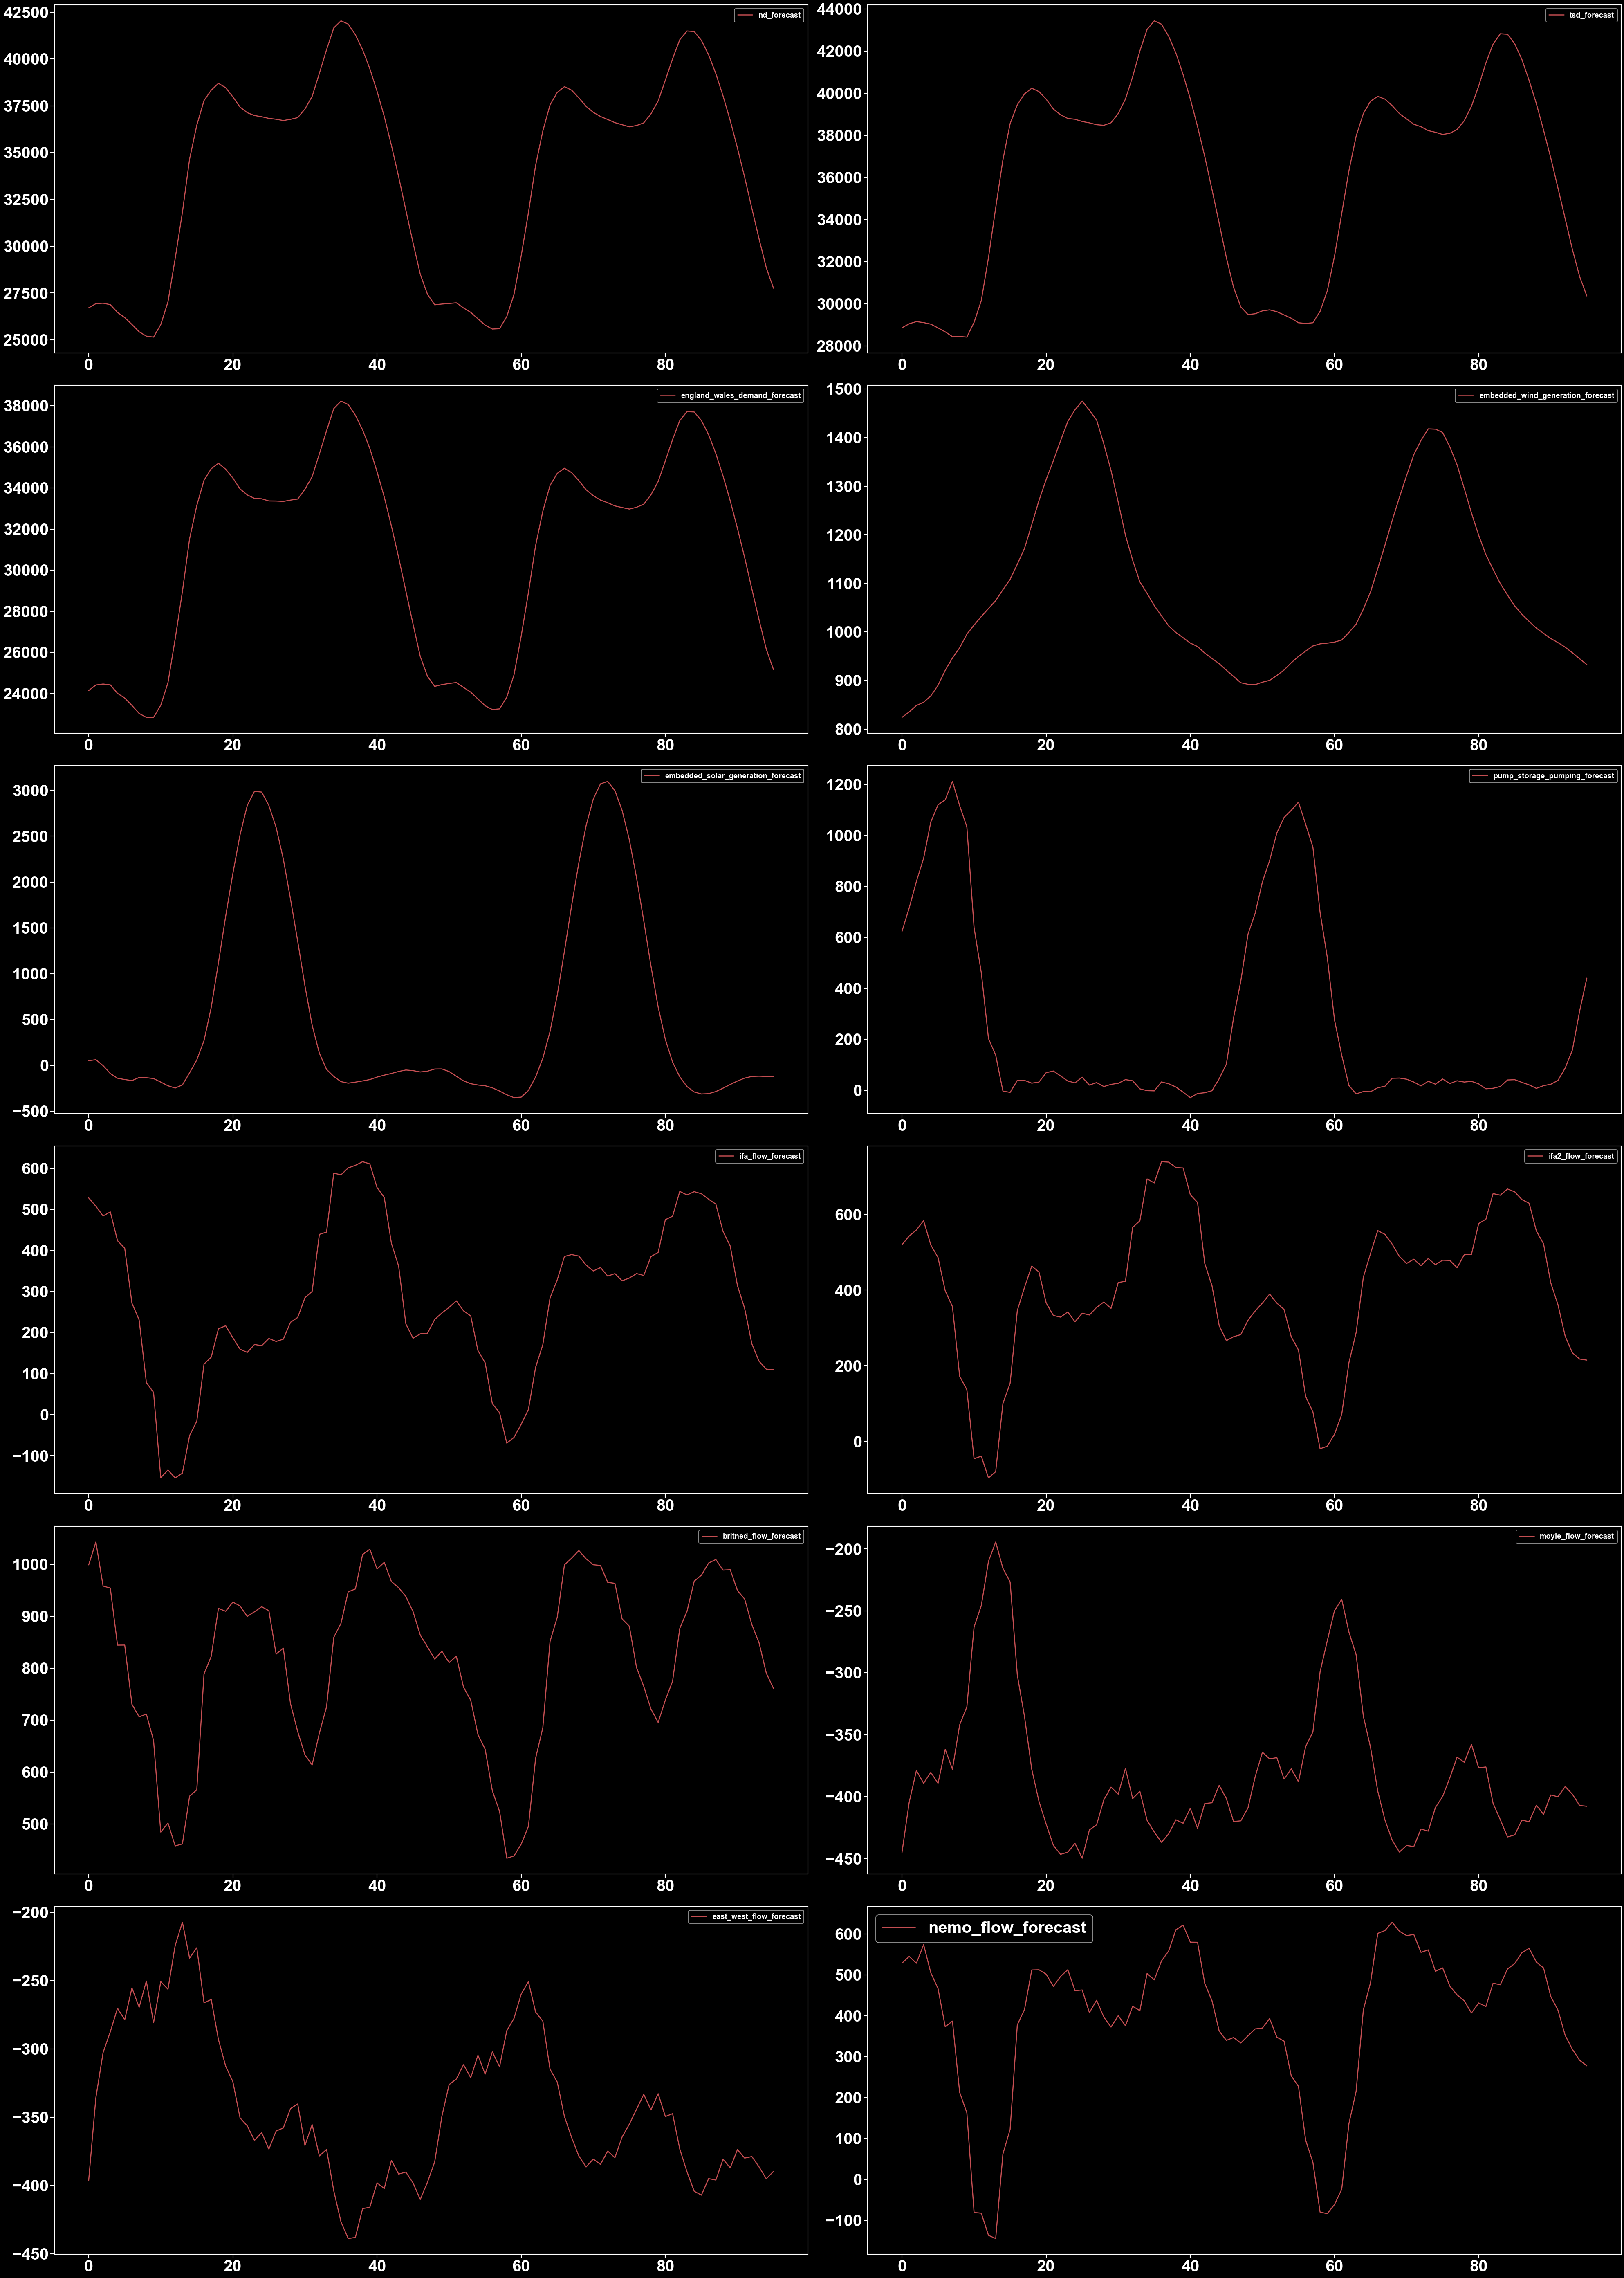

In [40]:
columns = df.columns
font = {'family': 'normal',
        'weight': 'bold',
        'size': 34}

plt.rc('font', **font)
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
fig, axes = plt.subplots(6, 2, figsize=(50, 70), dpi=80)
pred[columns + '_forecast'].plot(subplots=True, ax=axes, color='r', fontsize=36, legend=True)
#fig.legend(fontsize=20)
plt.legend(fontsize=36)
plt.tight_layout()
plt.show()